### SMA Crossover Strategy

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [27]:
data = yf.download('JPM', start='2017-02-11', end='2022-02-11')
data.drop(['Open', "High", "Low", "Adj Close", "Volume"], axis=1, inplace=True)
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()
data.dropna(inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Close,SMA20,SMA50
Date,,,
2017-04-25,88.260002,86.5070,88.8700
2017-04-26,88.430000,86.4985,88.8756
2017-04-27,87.610001,86.4655,88.8366
2017-04-28,87.000000,86.3640,88.7648
2017-05-01,87.059998,86.3250,88.6954


### Generating signal

In [28]:

data['Signal'] = np.where(data['SMA20'] > data['SMA50'], 1,0)
data.head()

,Close,SMA20,SMA50,Signal
Date,,,,
2017-04-25,88.260002,86.5070,88.8700,0
2017-04-26,88.430000,86.4985,88.8756,0
2017-04-27,87.610001,86.4655,88.8366,0
2017-04-28,87.000000,86.3640,88.7648,0
2017-05-01,87.059998,86.3250,88.6954,0


### Creating position

In [29]:
data["Position"] = data['Signal'].diff()
data.head()

,Close,SMA20,SMA50,Signal,Position
Date,,,,,
2017-04-25,88.260002,86.5070,88.8700,0,NaN
2017-04-26,88.430000,86.4985,88.8756,0,0.0
2017-04-27,87.610001,86.4655,88.8366,0,0.0
2017-04-28,87.000000,86.3640,88.7648,0,0.0
2017-05-01,87.059998,86.3250,88.6954,0,0.0


### Plotting data

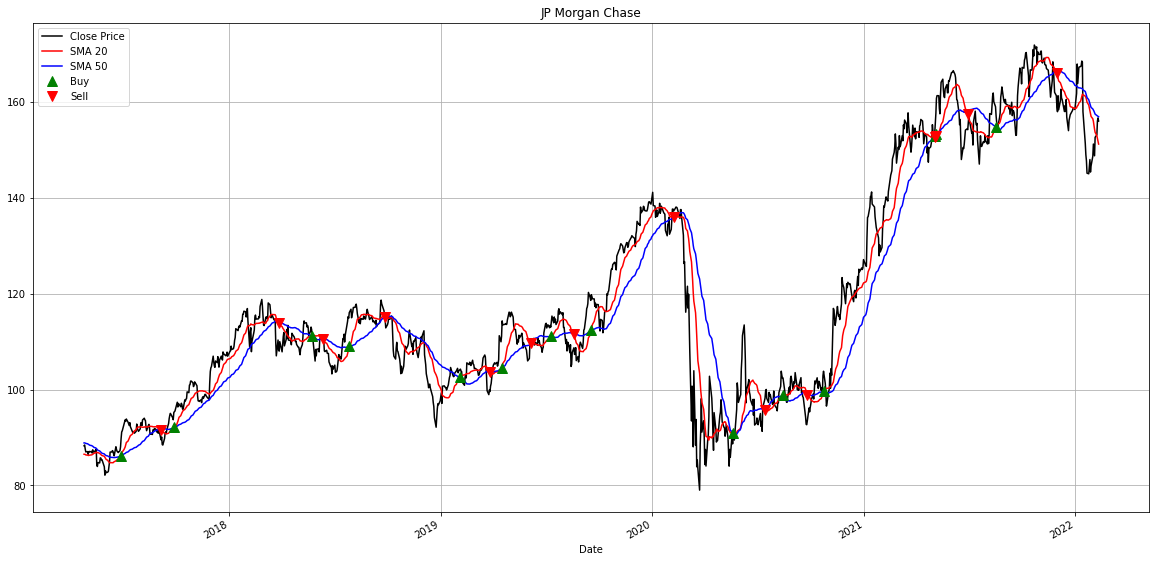

In [31]:
plt.figure(figsize=(20,10))

data['Close'].plot(color='k', label='Close Price')
data['SMA20'].plot(color='r', label='SMA 20')
data['SMA50'].plot(color='b', label='SMA 50')

#Buy Signal

plt.plot(data[data["Position"]==1].index, data['SMA20'][data["Position"]==1], "^", markersize=10, color='g',label='Buy')

#Sell Signal

plt.plot(data[data["Position"]== -1].index, data['SMA20'][data["Position"]== -1], "v", markersize=10, color='r',label='Sell')


plt.title('JP Morgan Chase')
plt.legend()
plt.grid()
plt.show()